In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure

import os
import matplotlib.pyplot as plt

from k12libs.utils.nb_easy import k12ai_get_top_dir

## Load Image

(670, 391, 3)


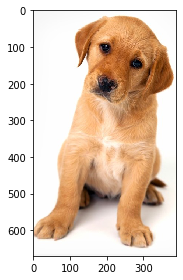

In [3]:
img_path = os.path.join(k12ai_get_top_dir(), 'assets', 'images', 'puppy.jpeg')
img = imread(img_path)
imshow(img)
print(img.shape)

## Resize Image

(128, 64, 3)


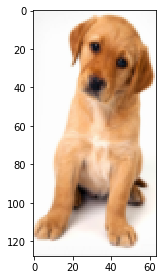

In [4]:
resized_img = resize(img, (128,64)) 
imshow(resized_img) 
print(resized_img.shape)

## Create Hog Features

In [5]:
fd, hog_image = hog(
    resized_img,
    orientations=9,            # the number of buckets (bins)
    pixels_per_cell=(8, 8),    # the size of cell
    cells_per_block=(2, 2),    # the size of block
    visualize=True,
    multichannel=True)

In [6]:
type(fd), fd.shape # The feature matrix 

(numpy.ndarray, (3780,))

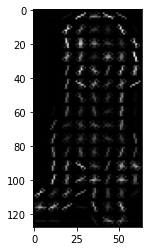

In [7]:
type(hog_image), plt.imshow(hog_image, cmap=plt.cm.gray);

## Show Hog Image

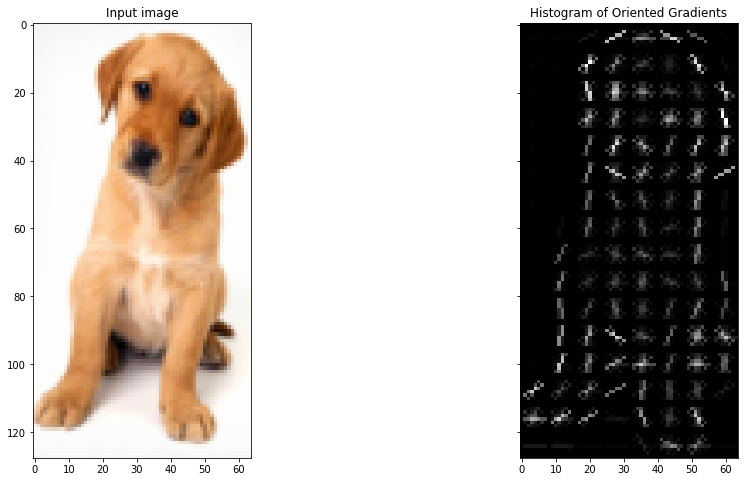

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8), sharex=True, sharey=True) 

ax1.imshow(resized_img, cmap=plt.cm.gray);
ax1.set_title('Input image');

# Rescale histogram for better display 
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10)) 

ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray);
ax2.set_title('Histogram of Oriented Gradients');